In [1]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggpubr)
require(pbapply)
pboptions(type="timer")
require(viridis)

source("../manuscript/functions/save_and_plot.R")

Loading required package: cowplot

Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: pbapply

Loading required package: viridis

Loading required package: viridisLite



In [2]:
root = "../data/strip_of_tissue"
nthreads=10

In [3]:
#list.files(file.path(root, "raw"), pattern="spots", full.name=T)
#list.files(file.path(root, "dw"), pattern="spots", full.name=T)

In [4]:
dots = rbindlist(list(
    rbindlist(lapply(list.files(file.path(root, "raw"), pattern="spots", full.name=T),
                     function(x) { d=fread(x); d$image_type="raw"; return(d)})),
    rbindlist(lapply(list.files(file.path(root, "dw"), pattern="spots", full.name=T),
                     function(x) { d=fread(x); d$image_type="dw"; return(d)}))
))

In [5]:
#dots[0 != nchar(target), unique(target)]

In [6]:
transcript_counts = dcast(dots[(passes_thresholds) & nchar(target) != 0, .N, by=c("target", "image_type")],
                          target~image_type, value.var="N")

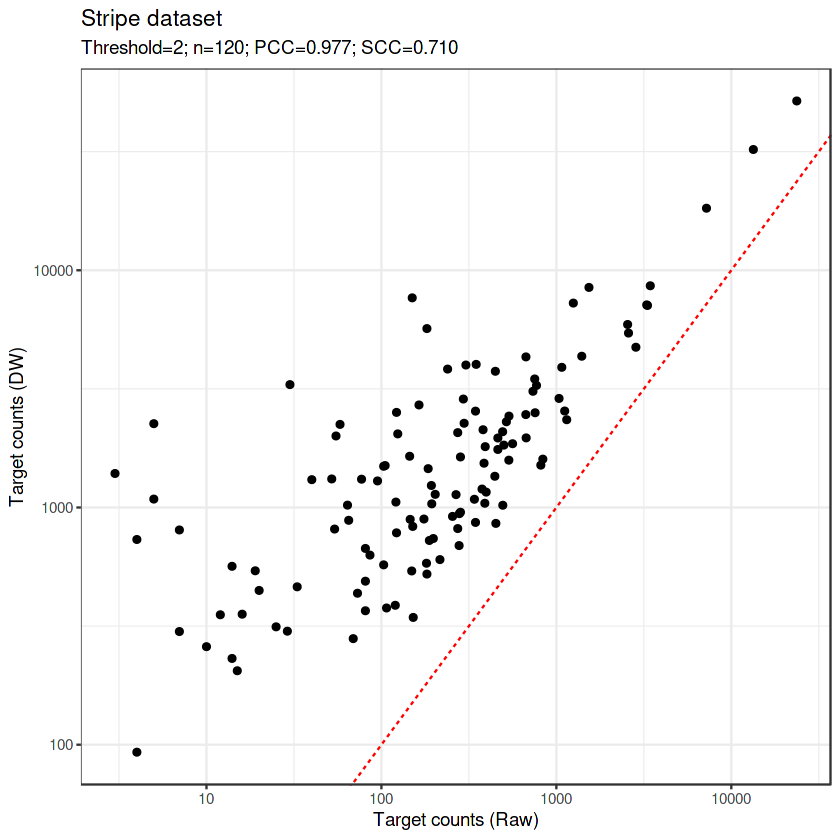

In [7]:
pcc = transcript_counts[, cor(raw, dw, use="pairwise.complete.obs", method="pearson")]
scc = transcript_counts[, cor(raw, dw, use="pairwise.complete.obs", method="spearman")]
p = ggplot(transcript_counts, aes(raw, dw)) + geom_point() +
    scale_x_log10() + scale_y_log10() +
    geom_abline(slope=1, color="red", linetype="dashed") +
    theme_bw() + labs(x="Target counts (Raw)", y="Target counts (DW)",
                      title="Stripe dataset", subtitle=sprintf("Threshold=2; n=%d; PCC=%.3f; SCC=%.3f", nrow(transcript_counts), pcc, scc))
print(p)
save_and_plot(p, "plots/stripe.transcript_counts.scatter", width=6, height=6, formats=c("pdf", "jpg", "png"))

In [8]:
transcript_counts[, reldelta := (dw-raw)/raw]

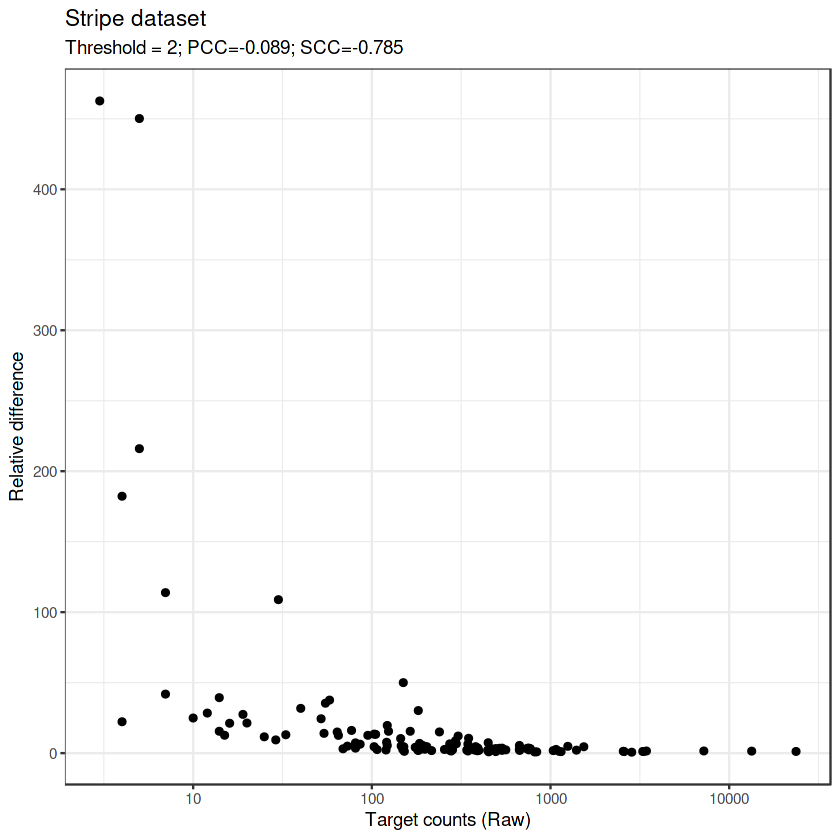

In [ ]:
pcc = transcript_counts[, cor(raw, reldelta, use="pairwise.complete.obs", method="pearson")]
scc = transcript_counts[, cor(raw, reldelta, use="pairwise.complete.obs", method="spearman")]
p = ggplot(transcript_counts, aes(raw, reldelta)) + geom_point() +
    scale_x_log10() + theme_bw() +
    labs(x="Target counts (Raw)", y="Relative difference", title="Stripe dataset",
         subtitle=sprintf("Threshold = 2; PCC=%.3f; SCC=%.3f", pcc, scc))
print(p)
save_and_plot(p, "plots/stripe.transcript_counts.reldelta.scatter", width=6, height=6, formats=c("pdf", "jpg", "png"))

In [10]:
transcript_counts[, fchange := dw/raw]

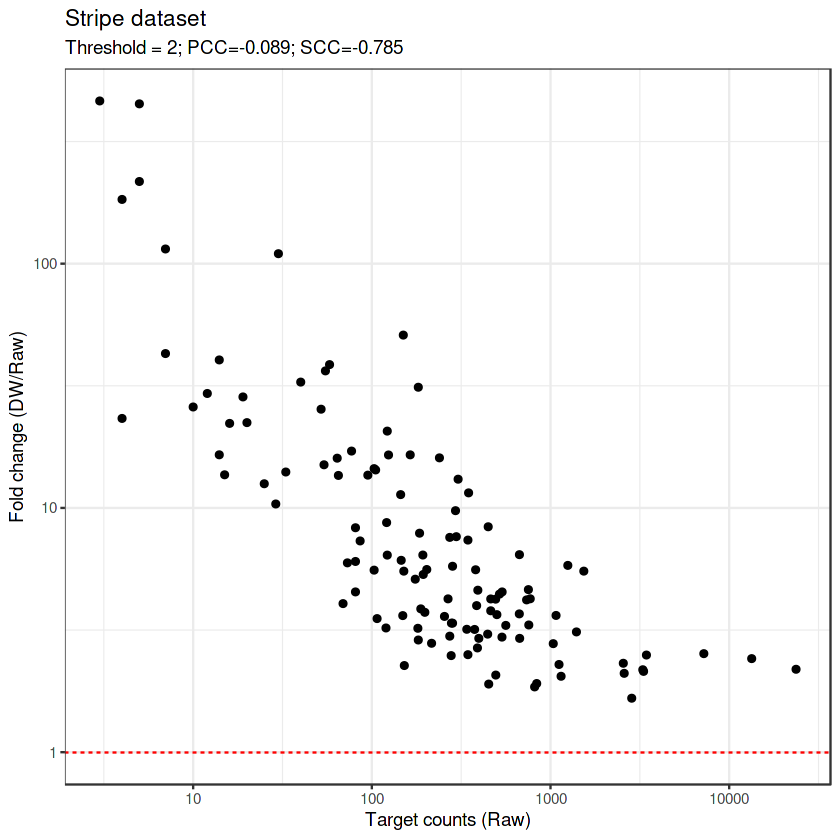

In [17]:
pcc = transcript_counts[, cor(raw, fchange, use="pairwise.complete.obs", method="pearson")]
scc = transcript_counts[, cor(raw, fchange, use="pairwise.complete.obs", method="spearman")]
p = ggplot(transcript_counts, aes(raw, fchange)) +
    geom_hline(yintercept=1, color="red", linetype="dashed") + geom_point() +
    scale_x_log10() + scale_y_log10() + theme_bw() +
    labs(x="Target counts (Raw)", y="Fold change (DW/Raw)", title="Stripe dataset",
         subtitle=sprintf("Threshold = 2; PCC=%.3f; SCC=%.3f", pcc, scc))
print(p)
save_and_plot(p, "plots/stripe.transcript_counts.fchange.scatter", width=6, height=6, formats=c("pdf", "jpg", "png"))